# GeMs Intro to Machine Learning Workshop (ML@B)

## Classifying MNIST Digits Using Convolutional Neural Network (CNN)
### Implemented with TensorFlow

In this part, we will demo how to train a neural network to classify handwritten digits (called the MNIST dataset).

We use TensorFlow to work with our data and train our model. We then use Matplotlib to visualize images and features in our dataset.

**Note**: To train your model faster, change the device type on Colab to **TPU (Tensor Processing Unit)** instead of GPU (Graphics Processing Unit), because the former has hardware specifically optimized to train neural networks quickly.

Go to Runtime > Change runtime type > Hardware accelerator and select TPU.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model

import random

In [2]:
# set random seed for notebook
np.random.seed(0)

In [3]:
# load in train/test MNIST data (images)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [4]:
# ensure loaded data/labels are of proper format
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

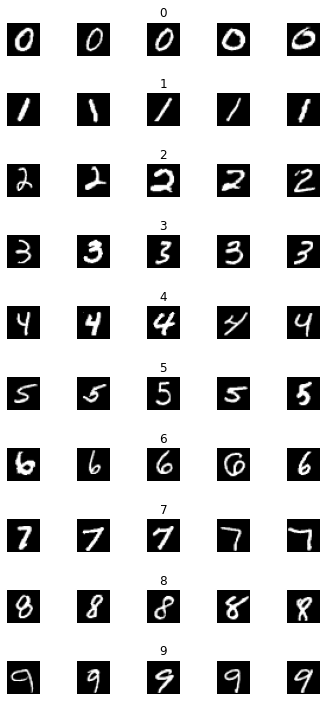

In [5]:
# display a few sample images across each class
num_of_samples=[] 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

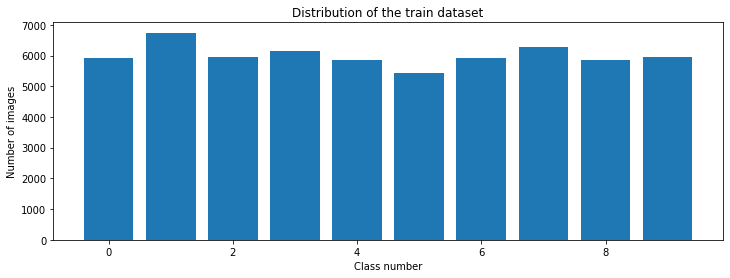

In [6]:
# display distribution of images across classes
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [7]:
# note how we're NOT FLATTENING the data, since this is a CNN and not a normal NN
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [8]:
# one-hot encoding our data (y_train and y_test)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

TensorFlow Layers Documentation:
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer

In [9]:
# beep beep boop pt1 - define the model function (2 conv layers, 2 pooling layers)

def CNN():
  model = Sequential()
  model.add(Conv2D(filters=30, kernel_size=(5, 5), input_shape=(28, 28, 1), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # conv --> 15 filters, 3x3 kernel
  # pool --> 2x2 pool kernel

  model.add(Conv2D(filters=15, kernel_size=(3, 3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dropout(0.5))
  model.add(Dense(500, activation="relu"))
  model.add(Dense(num_classes, activation="softmax"))
  model.compile(Adam(lr=0.01), loss="categorical_crossentropy", metrics=["accuracy"])

  return model


In [10]:
# beep beep boop pt2 - initialize model and print model architecture summary 
model = CNN()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 375)               0         
                                                                 
 dropout (Dropout)           (None, 375)               0

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
# beep beep boop pt3 - # train the model, mAcHiNe lEaRnInG time lesgooo
h = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=400, verbose=1, shuffle=1)

Epoch 1/10
135/135 [==============================] - 11s 9ms/step - loss: 0.3052 - accuracy: 0.8995 - val_loss: 0.0475 - val_accuracy: 0.9848
Epoch 2/10
135/135 [==============================] - 1s 7ms/step - loss: 0.1247 - accuracy: 0.9607 - val_loss: 0.0519 - val_accuracy: 0.9835
Epoch 3/10
135/135 [==============================] - 1s 7ms/step - loss: 0.1005 - accuracy: 0.9684 - val_loss: 0.0376 - val_accuracy: 0.9875
Epoch 4/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0904 - accuracy: 0.9723 - val_loss: 0.0386 - val_accuracy: 0.9890
Epoch 5/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0815 - accuracy: 0.9740 - val_loss: 0.0334 - val_accuracy: 0.9903
Epoch 6/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0808 - accuracy: 0.9752 - val_loss: 0.0356 - val_accuracy: 0.9897
Epoch 7/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0797 - accuracy: 0.9745 - val_loss: 0.0368 - val_accuracy: 0.9885
Epoch

Text(0.5, 0, 'epochs')

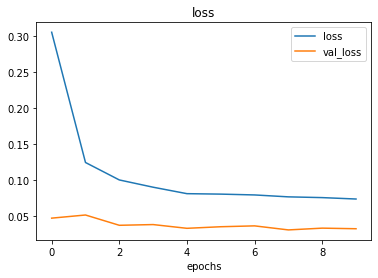

In [12]:
# plot of model loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

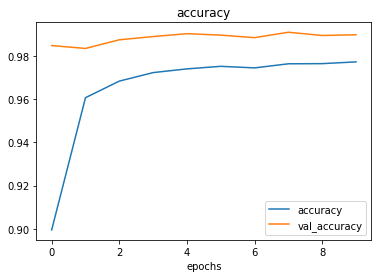

In [13]:
# plot of model accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')

In [14]:
# display test accuracy of model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: ', score[1])

Test Accuracy:  0.9887999892234802


<Response [200]>


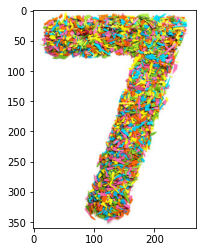

In [15]:
# try out your own images from online! first load in the image from online

import requests
from PIL import Image # PIL = Python Imaging Library

# TEST IMAGES: handwritten digit "2" (first link), paint brush digit "3" (second link), confetti decor digit "7" (third link)
# url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
# url = 'https://image.shutterstock.com/image-photo/3-red-handwritten-digits-over-600w-68815291.jpg'
url = 'https://t3.ftcdn.net/jpg/03/05/50/56/360_F_305505660_ziJ4g08W6qZRBQnDFEARKozuzN8hLbpB.jpg'

response = requests.get(url, stream=True) # getting image from url ~ stream=True means that it won't download image into memory
print(response) # <Response [200]> = successful get request

img = Image.open(response.raw)
plt.imshow(img)

(360, 270, 3)
(28, 28, 3)
(28, 28)


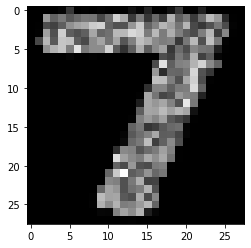

In [16]:
# convert images to model input format (size/shape, colorspace, etc.)

import cv2 # it's OpenCV time!

img_array = np.asarray(img) # converts input data (image) into an array
print(img_array.shape) # --> (850, 850, 4), because four channels R/B/G/alpha

resized = cv2.resize(img_array, (28, 28))
print(resized.shape) # --> (28, 28, 4), because four channels R/B/G/alpha

gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
print(gray_scale.shape) # --> (28, 28), converting to grayscale = got rid of four channels, making 2-D image array

image = cv2.bitwise_not(gray_scale) # flip color of all pixels (negative coloring), to make black background w/ white number

plt.imshow(image, cmap=plt.get_cmap('gray')) # make sure to specify the proper colormap, or else it'll look purple/yellow and weird

image = image / 255 # normalize all pixel intensities in the image
image = image.reshape(1, 28, 28, 1)

In [17]:
# run image through model, and output predicted digit class!
prediction = model.predict(image) 
prediction_class = np.argmax(prediction, axis=1)
print("Predicted Digit: ", prediction_class)

1/1 [==============================] - 0s 119ms/step
Predicted Digit:  [7]


In [18]:
# THIS STAGE: allows us to take a visual look into what each layer is doing, assigning layer1/layer2 to use same input, and return specific output at different stages of our model
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output) # lets us look at what FIRST convolutional layer (first layer in model) is outputting
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output) # lets us look at what SECOND convolutional layer (third layer in model, skip pooling) is outputting

visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
# print(visual_layer1.shape) --> matches size of output in first layer of model (first Conv) = 1/24/24/30
# print(visual_layer2.shape) --> matches size of output in third layer of model (second Conv) = 1/10/10/15

1/1 [==============================] - 0s 40ms/step


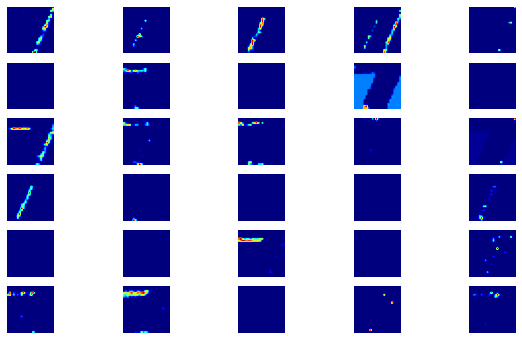

In [19]:
# FIRST LAYER: look into what the FIRST convolutional layer is outputting, and what features it is extracting from our handwritten digit
plt.figure(figsize=(10, 6)) # just arbitrary numbers to tinker with, in order to get good spacing between images to plot
for i in range(30): # since 30 feature maps after first convolutional layer
  plt.subplot(6, 5, i + 1) # does not zero-index, so i + 1
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet')) # visual_layer1 outputs 1/24/24/30 --> get all pixels of each feature map, for specific map 'i' currently on
  plt.axis('off')

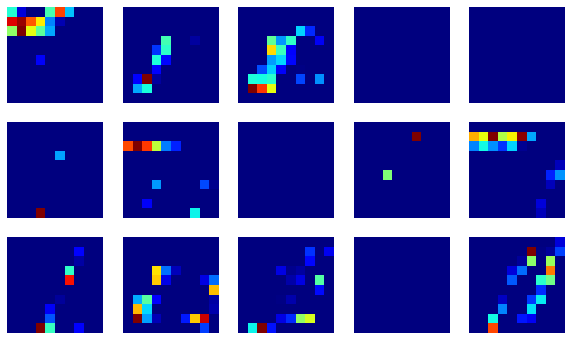

In [20]:
# THIRD LAYER (skipped 2nd layer bc pooling): look into what the SECOND convolutional layer is outputting, and what features it is extracting from our handwritten digit
plt.figure(figsize=(10, 6)) # just arbitrary numbers to tinker with, in order to get good spacing between images to plot
for i in range(15): # since 15 feature maps after first convolutional layer
  plt.subplot(3, 5, i + 1) # does not zero-index, so i + 1
  plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet')) # visual_layer2 outputs 1/10/10/15 --> get all pixels of each feature map, for specific map 'i' currently on
  plt.axis('off')